In [2]:
#Standard utilities
import itertools
import glob
import numpy as np
import pandas as pd

#Preprocessing
from sklearn import preprocessing
from sklearn.utils import shuffle
from sklearn.cross_validation import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import normalize
from sklearn.cross_validation import train_test_split # Data splitting

#Machine Learinging Classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Performance Measures
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix, matthews_corrcoef

#plotting
import seaborn as sns
import matplotlib as mpl
from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions
sns.set_context('paper',font_scale=2.0)
#sns.set_style("ticks",)
palette = sns.plt.cm.gray_r
# set masked values to plot red
palette.set_bad('r', 1.0)

In [3]:
data_files = shuffle(glob.glob("HH133*pks1613*csv"),random_state=3)
print data_files

['HH1333134985_pks1613-586.1822.ms_all_data_baseline0and3.csv', 'HH1333305511_pks1613-586.1822.ms_all_data_baseline0and2.csv', 'HH1333305511_pks1613-586.1822.ms_all_data_baseline0and3.csv', 'HH1333134985_pks1613-586.1822.ms_all_data_baseline0and4.csv', 'HH1333134985_pks1613-586.1822.ms_all_data_baseline5and6.csv', 'HH1333305511_pks1613-586.1822.ms_all_data_baseline0and4.csv', 'HH1333134985_pks1613-586.1822.ms_all_data_baseline1and3.csv', 'HH1333134985_pks1613-586.1822.ms_all_data_baseline1and2.csv', 'HH1333134985_pks1613-586.1822.ms_all_data_baseline0and6.csv', 'HH1333134985_pks1613-586.1822.ms_all_data_baseline1and5.csv', 'HH1333134985_pks1613-586.1822.ms_all_data_baseline2and4.csv', 'HH1333305511_pks1613-586.1822.ms_all_data_baseline0and1.csv', 'HH1333134985_pks1613-586.1822.ms_all_data_baseline0and1.csv', 'HH1333134985_pks1613-586.1822.ms_all_data_baseline0and5.csv', 'HH1333305511_pks1613-586.1822.ms_all_data_baseline2and4.csv', 'HH1333305511_pks1613-586.1822.ms_all_data_baseline5an

In [6]:
datasets = []
for filename in shuffle(data_files,random_state=4)[:3]:
    data = pd.DataFrame.from_csv(filename)
    if len(np.where(data["rfi"].values == 1)[0])/float(len(data["rfi"])) < 0.4:
        datasets.append(data)
        print filename
    del data
X0 = pd.concat(datasets, ignore_index=True)
del datasets

HH1333134985_pks1613-586.1822.ms_all_data_baseline1and4.csv
HH1333134985_pks1613-586.1822.ms_all_data_baseline2and3.csv
HH1333134985_pks1613-586.1822.ms_all_data_baseline5and6.csv


In [7]:
names = ["d_p","tC_mean","tp_mean",'t_skew','t_kurtosis','t_cumsumx','t_sumvalues'
         ,'t_slope','t_per25','t_per75','t_var',"fC_mean","fp_mean",'f_skew'
         ,'f_kurtosis','f_cumsumx','f_sumvalues','f_slope','f_per25','f_per75','f_var']
target_names = ['Not RFI','RFI']

In [8]:
for i in range(10):
    X0= shuffle(X0,random_state=2458)
HH_X0_not = X0[X0["rfi"]==0]
HH_X0_is = X0[X0["rfi"]==1]
X0 = pd.concat([HH_X0_not[:int(len(HH_X0_is)/len(data_files)*4.0)],HH_X0_is[:len(HH_X0_is)/len(data_files)]], ignore_index=True)
del HH_X0_not
del HH_X0_is
X0 = shuffle(X0.drop_duplicates())
print len(X0),len(np.unique(X0["d_p"]))

1700 1700


In [9]:
x_train0, x_test0, y_train0, y_test0 = train_test_split(X0[names]
                                        ,X0['rfi'], test_size=0.30
                                        ,random_state=6)

In [10]:
pairs = list(itertools.combinations(names,2))
len(pairs)

210

In [11]:
pair_num = 140
pairs[pair_num]

('t_per25', 'f_slope')

0 1 2 3

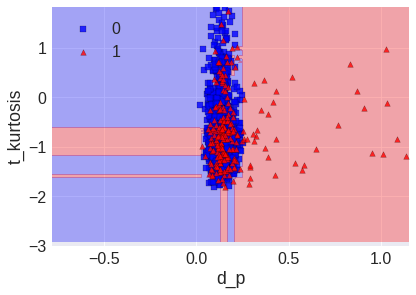

In [12]:
for pair_num in range(4):
    print pair_num,
    if pair_num > 0:
        sns.plt.close()
    rfc = RandomForestClassifier(n_jobs=-1,random_state=8)
    rfc.fit(x_train0[list(pairs[pair_num])].values, y_train0.values)
    sns.plt.figure()
    #sns.plt.subplots_adjust(wspace=.5)
    #sns.plt.subplot(131)
    plot_decision_regions(x_train0[list(pairs[pair_num])].values, y_train0.values, clf=rfc,
                  legend=2,colors="b,r",markers="s^")
    #sns.plt.xlim(0.0,0.2)
    #sns.plt.ylim(-0.2,0.2)
    sns.plt.xlabel(list(pairs[pair_num])[0])
    sns.plt.ylabel(list(pairs[pair_num])[1])
    sns.plt.grid(True)
    sns.plt.xlim(np.mean(x_train0[pairs[pair_num][0]]) - 3.0*np.std(x_train0[pairs[pair_num][0]])
                 ,np.mean(x_train0[pairs[pair_num][0]]) + 3.0*np.std(x_train0[pairs[pair_num][0]]))
    
    sns.plt.ylim(np.mean(x_train0[pairs[pair_num][1]]) - 3.0*np.std(x_train0[pairs[pair_num][1]])
                 ,np.mean(x_train0[pairs[pair_num][1]]) + 3.0*np.std(x_train0[pairs[pair_num][1]]))
    #sns.plt.title('RFC')
    sns.plt.savefig("Results/HH/RFC_D-regions_"+list(pairs[pair_num])[1]+"_vs_"+list(pairs[pair_num])[0]+".png",dpi=600)
sns.plt.show()

0 1 2 3

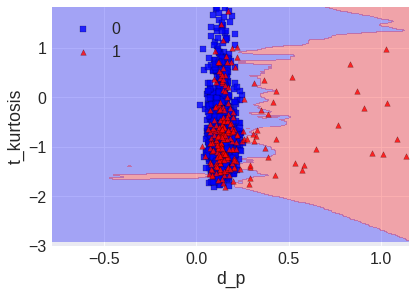

In [13]:
for pair_num in range(4):
    print pair_num,
    if pair_num > 0:
        sns.plt.close()
    sns.plt.figure()
    knn = KNeighborsClassifier(n_jobs=-1)
    knn.fit(x_train0[list(pairs[pair_num])].values, y_train0.values)
    plot_decision_regions(x_train0[list(pairs[pair_num])].values, y_train0.values, clf=knn,
                          legend=2,colors="b,r",markers="s^")
    #sns.plt.xlim(0.0,0.2)
    #sns.plt.ylim(-0.2,0.2)
    sns.plt.xlabel(list(pairs[pair_num])[0])
    sns.plt.ylabel(list(pairs[pair_num])[1])
    sns.plt.grid(True)
    sns.plt.xlim(np.mean(x_train0[pairs[pair_num][0]]) - 3.0*np.std(x_train0[pairs[pair_num][0]])
                 ,np.mean(x_train0[pairs[pair_num][0]]) + 3.0*np.std(x_train0[pairs[pair_num][0]]))
    
    sns.plt.ylim(np.mean(x_train0[pairs[pair_num][1]]) - 3.0*np.std(x_train0[pairs[pair_num][1]])
                 ,np.mean(x_train0[pairs[pair_num][1]]) + 3.0*np.std(x_train0[pairs[pair_num][1]]))
    #sns.plt.title("KNN")
    sns.plt.savefig("Results/HH/KNN_D-regions_"+list(pairs[pair_num])[1]+"_vs_"+list(pairs[pair_num])[0]+".png",dpi=600)
sns.plt.show()

0 1 2 3

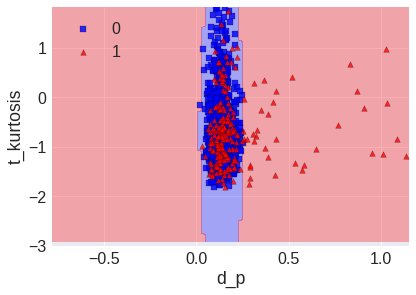

In [14]:
for pair_num in range(4):
    print pair_num,
    if pair_num > 0:
        sns.plt.close()
    sns.plt.figure()
    gnb = GaussianNB()
    gnb.fit(x_train0[list(pairs[pair_num])].values, y_train0.values)
    plot_decision_regions(x_train0[list(pairs[pair_num])].values, y_train0.values, clf=gnb,
                          legend=2,colors="b,r",markers="s^")
    #sns.plt.xlim(0.0,0.2)
    #sns.plt.ylim(-0.2,0.2)
    sns.plt.xlabel(list(pairs[pair_num])[0])
    sns.plt.ylabel(list(pairs[pair_num])[1])
    #sns.plt.title('NB')
    sns.plt.grid(True)
    sns.plt.xlim(np.mean(x_train0[pairs[pair_num][0]]) - 3.0*np.std(x_train0[pairs[pair_num][0]])
                 ,np.mean(x_train0[pairs[pair_num][0]]) + 3.0*np.std(x_train0[pairs[pair_num][0]]))
    
    sns.plt.ylim(np.mean(x_train0[pairs[pair_num][1]]) - 3.0*np.std(x_train0[pairs[pair_num][1]])
                 ,np.mean(x_train0[pairs[pair_num][1]]) + 3.0*np.std(x_train0[pairs[pair_num][1]]))
    sns.plt.savefig("Results/HH/NB_D-regions_"+list(pairs[pair_num])[1]+"_vs_"+list(pairs[pair_num])[0]+".png",dpi=600)

sns.plt.show()
#sns.plt.figure()
#iris_melt = pd.melt(X0[[names[1]]+["rfi"]], "rfi", var_name="measurement")
##f, ax = sns.plt.subplots(1, figsize=(15,9))
#sns.boxplot( hue="rfi",palette=["b","r"], data=iris_melt,x="measurement", y="value")#, jitter=True, edgecolor="white")
#sns.plt.grid(True)
##sns.plt.ylim(-(np.mean(X0[names[1]])+0.1),np.mean(X0[names[1]])+0.1)
#sns.plt.show()

0

/data/olorato/mywork/local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


 1 2 3

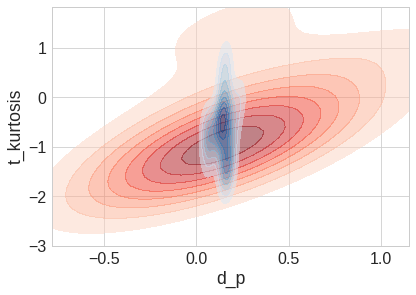

In [15]:
for pair_num in range(4):
    print pair_num,
    if pair_num > 0:
        sns.plt.close()
    sns.plt.figure()
    sns.set_style("whitegrid")
    sns.kdeplot(x_train0[list(pairs[pair_num])[0]][y_train0==1].values[:20]
                ,x_train0[list(pairs[pair_num])[1]][y_train0==1].values[:20]
                ,cmap="Reds",shade=True, shade_lowest=False,alpha=0.5, cbar=True)
    sns.kdeplot(x_train0[list(pairs[pair_num])[0]][y_train0==0].values[:20]
                ,x_train0[list(pairs[pair_num])[1]][y_train0==0].values[:20]
                ,cmap="Blues",shade=True, shade_lowest=False,alpha=0.5, cbar=True)
    sns.plt.ylabel(list(pairs[pair_num])[1])
    sns.plt.xlabel(list(pairs[pair_num])[0])
    sns.plt.legend(loc="best")
    sns.plt.xlim(np.mean(x_train0[pairs[pair_num][0]]) - 3.0*np.std(x_train0[pairs[pair_num][0]])
                 ,np.mean(x_train0[pairs[pair_num][0]]) + 3.0*np.std(x_train0[pairs[pair_num][0]]))
    
    sns.plt.ylim(np.mean(x_train0[pairs[pair_num][1]]) - 3.0*np.std(x_train0[pairs[pair_num][1]])
                 ,np.mean(x_train0[pairs[pair_num][1]]) + 3.0*np.std(x_train0[pairs[pair_num][1]]))
    sns.plt.savefig("Results/HH/Density_"+list(pairs[pair_num])[1]+"_vs_"+list(pairs[pair_num])[0]+".png",dpi=600)
sns.plt.show()

0 1 2

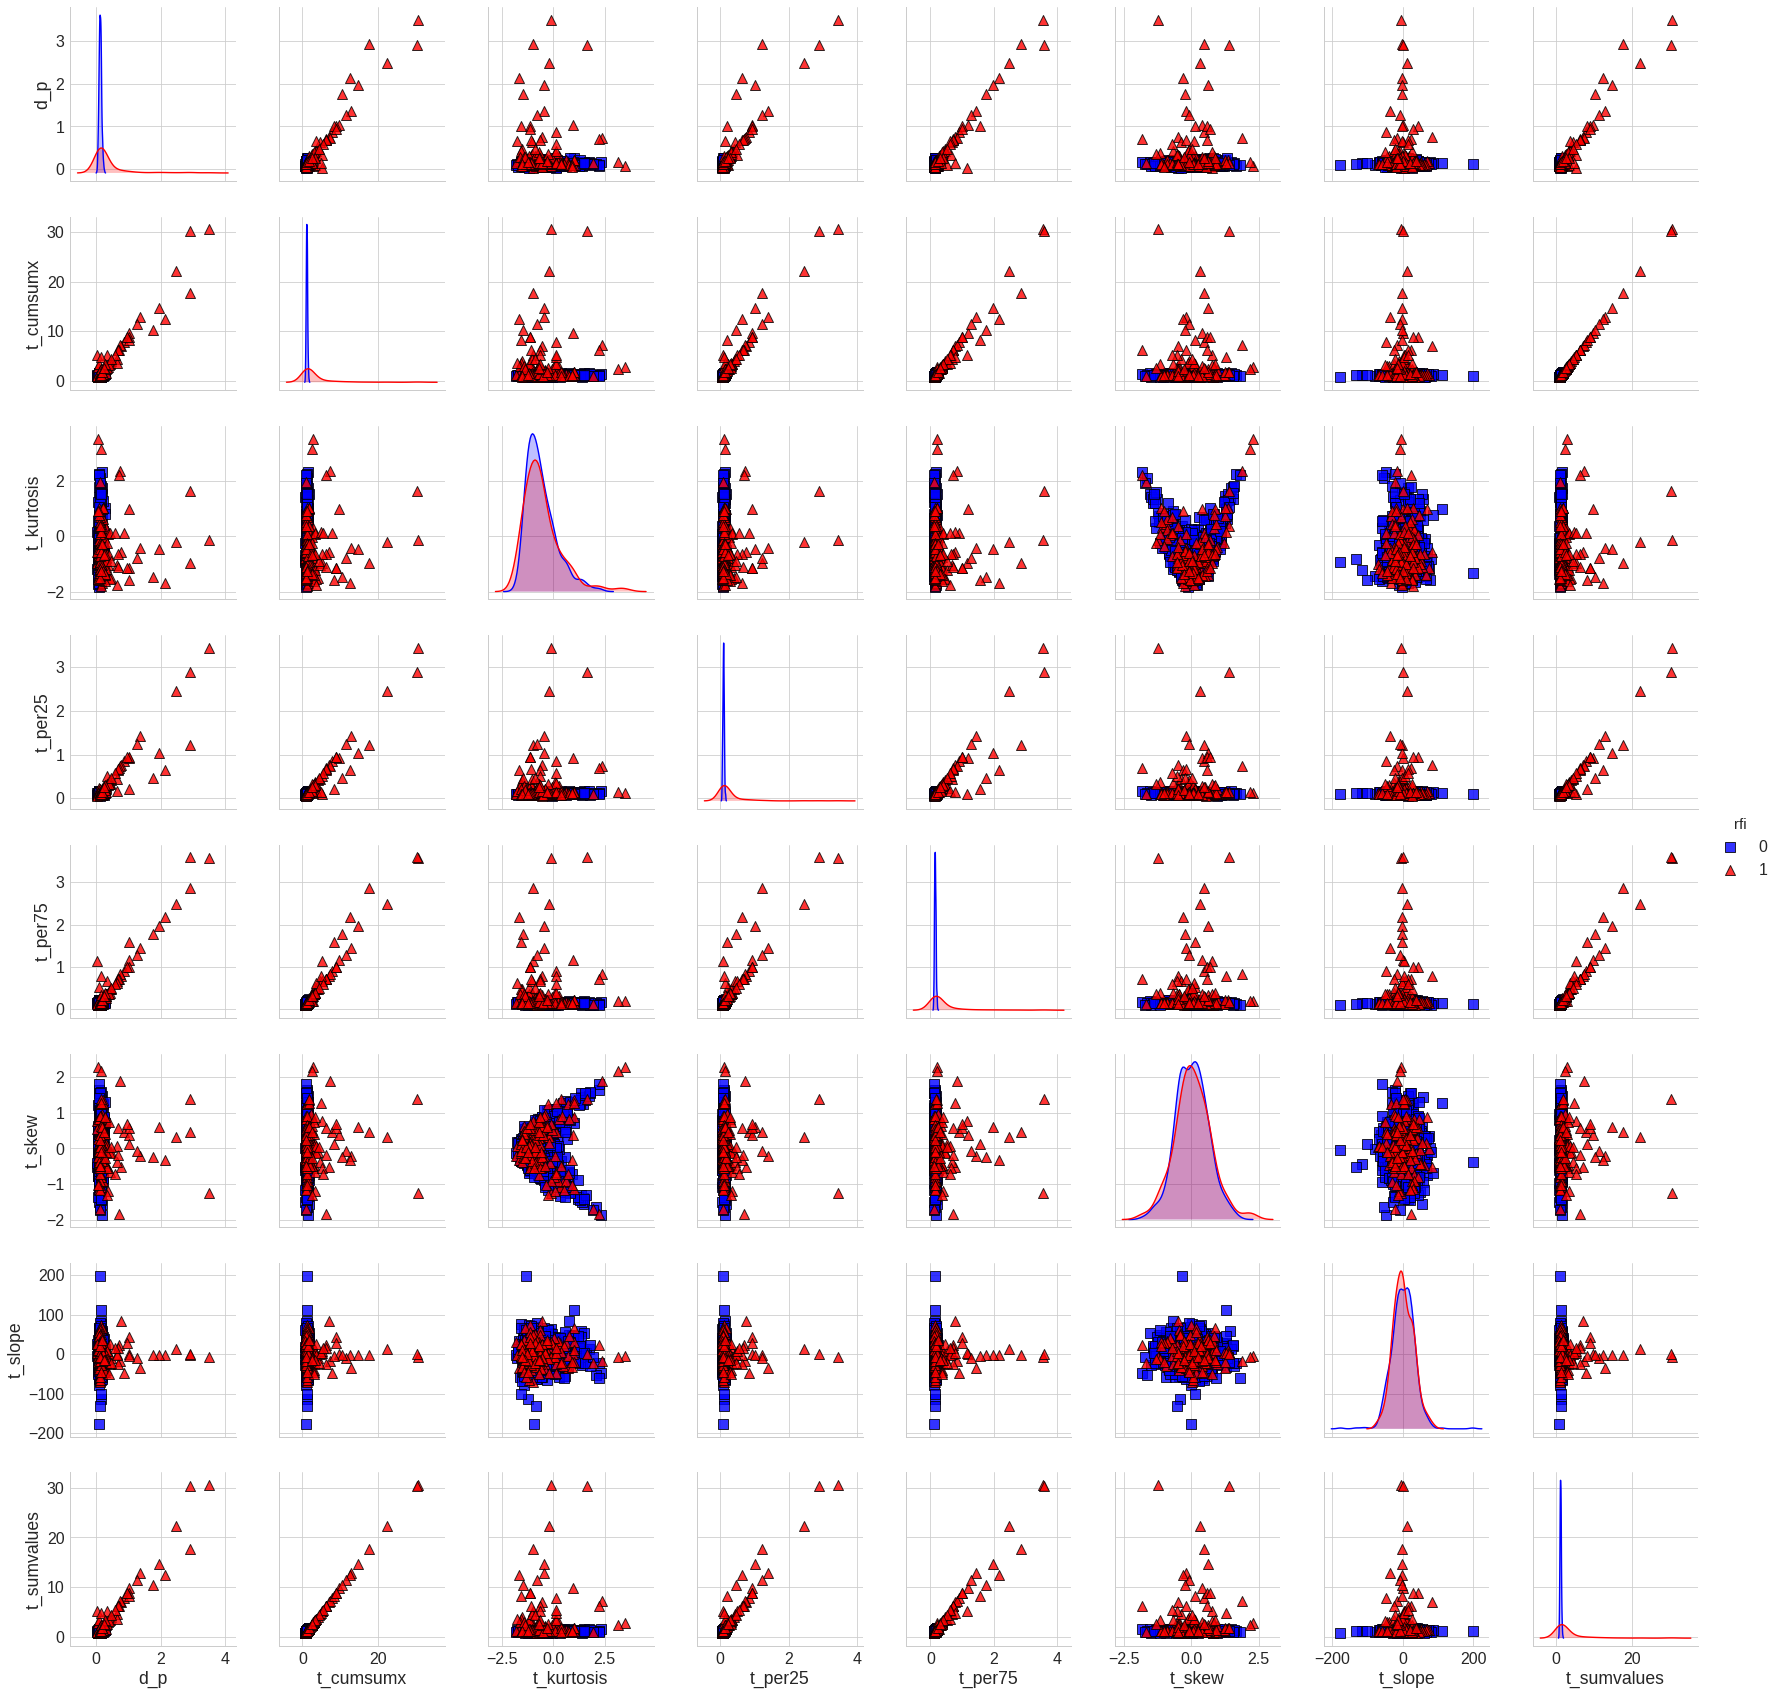

In [16]:
for i in range(3):
    print i,
    if i > 0:
        sns.plt.close()
    sns.plt.figure()
    sns.set_style("whitegrid")
    sns.pairplot(shuffle(X0)[:800], size=3 ,diag_kind="kde",hue="rfi",palette=["b","r"],
                 vars=np.unique(list(itertools.combinations(names,2))[i:i+7]),markers=["s","^"],
                 plot_kws=dict(s=100, edgecolor="k", linewidth=1,alpha=0.8,),
                 diag_kws=dict(shade=True))
    #sns.pairplot(X0[X0.rfi==1][:5], diag_kind="kde",markers='^')
    sns.plt.savefig("Results/HH/Features_"+str(i)+".png",dpi=600)
sns.plt.show()

In [17]:
model_acc_rfc = []
model_acc_gnb = []
model_acc_knn = []
for i in range(100):
    if i % 10 == 0:
        print i,
    X0 = shuffle(X0)
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(X0[names], X0['rfi'], train_size=0.7)
    
    decision_tree_classifier = RandomForestClassifier(n_jobs=-1,random_state=4)
    decision_tree_classifier.fit(training_inputs, training_classes)
    classifier_accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)
    model_acc_rfc.append(classifier_accuracy)
    
    decision_tree_classifier = GaussianNB()
    decision_tree_classifier.fit(training_inputs, training_classes)
    classifier_accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)
    model_acc_gnb.append(classifier_accuracy)
    
    decision_tree_classifier = KNeighborsClassifier(n_jobs=-1)
    decision_tree_classifier.fit(training_inputs, training_classes)
    classifier_accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)
    model_acc_knn.append(classifier_accuracy)

del training_inputs
del testing_inputs
del training_classes
del testing_classes
del classifier_accuracy
del decision_tree_classifier

0 10 20 30 40 50 60 70 80 90


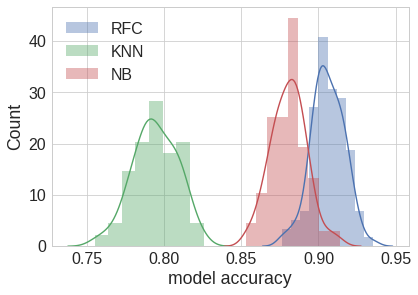

RFC: Mean 0.905941176471	std 0.0106514272626
KNN: Mean 0.794098039216	std 0.0145217094771
NB:  Mean 0.88062745098	std 0.0116010844128


In [18]:
sns.distplot(model_acc_rfc,label="RFC")
sns.distplot(model_acc_knn,label="KNN")
sns.distplot(model_acc_gnb, label="NB")
sns.plt.ylabel("Count")
sns.plt.xlabel("model accuracy")
sns.plt.legend(loc="best")
sns.plt.savefig("Results/HH/HH-average.png",dpi=600)
sns.plt.grid(True)
sns.plt.show()
with open("Results/HH/HH-average.txt","w") as f:
    f.write("RFC: Mean {0}\tstd {1} \n".format(np.mean(model_acc_rfc),np.std(model_acc_rfc)))
    f.write("KNN: Mean {0}\tstd {1} \n".format(np.mean(model_acc_knn),np.std(model_acc_knn)))
    f.write("NB:  Mean {0}\tstd {1} \n".format(np.mean(model_acc_gnb),np.std(model_acc_gnb)))
print "RFC: Mean {0}\tstd {1}".format(np.mean(model_acc_rfc),np.std(model_acc_rfc))
print "KNN: Mean {0}\tstd {1}".format(np.mean(model_acc_knn),np.std(model_acc_knn))
print "NB:  Mean {0}\tstd {1}".format(np.mean(model_acc_gnb),np.std(model_acc_gnb))



In [19]:
cv = StratifiedKFold(y=y_train0,shuffle=True,n_folds=6,random_state=0)

gnb = GaussianNB()
#grid = {"prior": np.resize([None],4)}
#gnb = RandomizedSearchCV(gnb, grid,cv=cv, n_jobs=-1)

rfc = RandomForestClassifier(n_jobs=-1,random_state=4)
grid = {'n_estimators': np.arange(1, 50)
        ,'criterion': ['gini', 'entropy']
        ,'max_features':['sqrt','log2']
        ,'max_depth':np.arange(1,50)
        ,'min_samples_split':np.arange(1,50)}
rfc = RandomizedSearchCV(rfc, grid, cv=cv,n_iter=30,random_state=10004)

knn = KNeighborsClassifier()
grid = {"n_neighbors": np.arange(1, 50, 2)
        ,"metric": ["euclidean", "minkowski"]}
knn = RandomizedSearchCV(knn, grid, cv=cv,n_iter=30)

In [20]:
gnb.fit(x_train0,y_train0)

GaussianNB(priors=None)

In [21]:
rfc.fit(x_train0,y_train0)

RandomizedSearchCV(cv=sklearn.cross_validation.StratifiedKFold(labels=[0 0 ..., 0 0], n_folds=6, shuffle=True, random_state=0),
          error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=4, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=30, n_jobs=1,
          param_distributions={'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]), 'max_features': ['sqrt', 'log2'], 'min_sampl...27, 28, 29, 30, 31, 32, 33, 34,
       35,

In [22]:
knn.fit(x_train0,y_train0)

RandomizedSearchCV(cv=sklearn.cross_validation.StratifiedKFold(labels=[0 0 ..., 0 0], n_folds=6, shuffle=True, random_state=0),
          error_score='raise',
          estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
          fit_params=None, iid=True, n_iter=30, n_jobs=1,
          param_distributions={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49]), 'metric': ['euclidean', 'minkowski']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring=None, verbose=0)

In [23]:
y_pred_prob_gnb = gnb.predict_proba(x_test0)
y_pred_prob_rfc = rfc.predict_proba(x_test0)
y_pred_prob_knn = knn.predict_proba(x_test0)
y_pred_gnb = gnb.predict(x_test0)
y_pred_rfc = rfc.predict(x_test0)
y_pred_knn = knn.predict(x_test0)

In [24]:
def report(results,num, n_top=3):
    #n_top = len(results['rank_test_score']) -1
    f = open("Results/HH/HH_"+num+"_CV","w")
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            f.write("Model with rank: {0} \n".format(i))
            f.write("Mean validation score: {0:.3f} (std: {1:.3f}) \n".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            f.write("Parameters: {0} \n".format(results['params'][candidate]))
            f.write("--- \n")
    f.close()
    print("Model with rank: {0}".format(i))
    print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
          results['mean_test_score'][candidate],
          results['std_test_score'][candidate]))
    print("Parameters: {0}".format(results['params'][candidate]))
    print("")

In [25]:
#report(gnb.cv_results_)

In [26]:
report(rfc.cv_results_,"RFC",n_top=len(rfc.cv_results_['rank_test_score'])-1)

Model with rank: 29
Mean validation score: 0.869 (std: 0.025)
Parameters: {'n_estimators': 1, 'min_samples_split': 48, 'criterion': 'gini', 'max_depth': 15, 'max_features': 'log2'}



In [27]:
report(knn.cv_results_,"KNN",n_top=len(knn.cv_results_['rank_test_score'])-1)

Model with rank: 29
Mean validation score: 0.718 (std: 0.030)
Parameters: {'n_neighbors': 1, 'metric': 'minkowski'}



In [25]:
rfc=rfc.best_estimator_
knn=knn.best_estimator_

In [26]:
def roc_plot(classifiers,subplot,model_names):
    #c = ['r','g','b']
    if subplot == True:
        num = len(classifiers)
        sns.plt.figure()
        for i in range(num):
            sns.plt.subplot(1,num,i+1)
            clf = classifiers[i]
            y_roc_fpr, y_roc_tpr, y_roc_thresholds = roc_curve(y_test0, clf[:,1])
            sns.plt.plot(y_roc_fpr, y_roc_tpr,label=model_names[i]+' AUC = %0.2f'% auc(y_roc_fpr, y_roc_tpr))
            sns.plt.legend(loc='lower right')
            sns.plt.plot([0,1],[0,1],'r--')
            sns.plt.xlim([-0.1,1.2])
            sns.plt.ylim([-0.1,1.2])
            sns.plt.ylabel('True Positive Rate')
            sns.plt.xlabel('False Positive Rate')
    if subplot == False:
        num = len(classifiers)
        sns.plt.figure()
        for i in range(num):
            clf = classifiers[i]
            y_roc_fpr, y_roc_tpr, y_roc_thresholds = roc_curve(y_test0, clf[:,1])
            sns.plt.plot(y_roc_fpr, y_roc_tpr,label=model_names[i]+' AUC = %0.2f'% auc(y_roc_fpr, y_roc_tpr))
            sns.plt.legend(loc='lower right')
            sns.plt.plot([0,1],[0,1],'r--')
            sns.plt.xlim([-0.1,1.2])
            sns.plt.ylim([-0.1,1.2])
            sns.plt.ylabel('True Positive Rate')
            sns.plt.xlabel('False Positive Rate')
    return

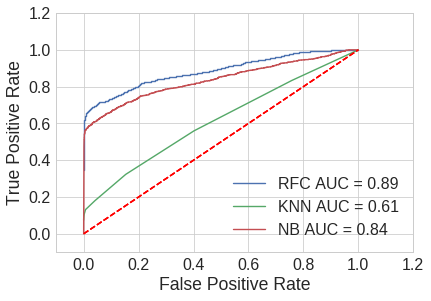

In [27]:
model_names =['RFC','KNN','NB']
roc_plot([y_pred_prob_rfc,y_pred_prob_knn,y_pred_prob_gnb],False,model_names)
sns.plt.grid(True)
sns.plt.savefig("Results/HH/HH-ROC.png",dpi=600)
sns.plt.show()

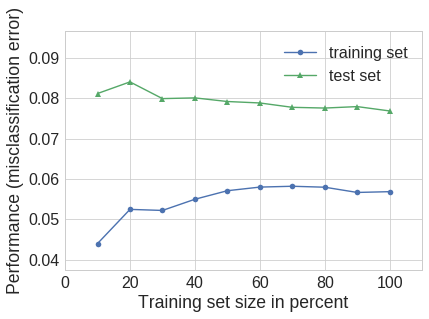

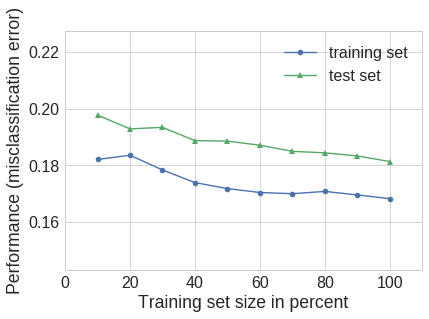

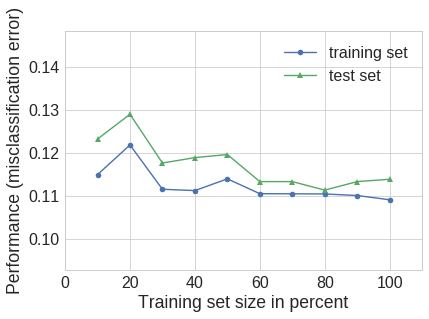

In [28]:
sns.plt.figure()
plot_learning_curves(x_train0.values, y_train0.values, x_test0.values, y_test0.values, rfc
                     ,print_model=False,style="seaborn-whitegrid")
sns.plt.savefig("Results/HH/HH-RFC_learning_curve.png",dpi=600)
sns.plt.figure()
plot_learning_curves(x_train0.values, y_train0.values, x_test0.values, y_test0.values, knn
                     ,print_model=False,style="seaborn-whitegrid")
sns.plt.savefig("Results/HH/HH-KNN_learning_curve.png",dpi=600)
sns.plt.figure()
plot_learning_curves(x_train0.values, y_train0.values, x_test0.values, y_test0.values, gnb
                     ,print_model=False,style="seaborn-whitegrid")
sns.plt.savefig("Results/HH/HH-NB_learning_curve.png",dpi=600)

sns.plt.show()

In [1]:
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=sns.plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    sns.plt.imshow(cm, interpolation='nearest', cmap=cmap)
    #sns.plt.title(title)
    #sns.plt.colorbar()
    tick_marks = np.arange(len(classes))
    sns.plt.xticks(tick_marks, classes, rotation=45)
    sns.plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        pass
        #print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            sns.plt.text(j, i, round(cm[i, j],2),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            sns.plt.text(j, i, cm[i, j],
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    sns.plt.tight_layout()
    sns.plt.grid(False)
    sns.plt.ylabel('True label')
    sns.plt.xlabel('Predicted label')
    
def evaluate(model,modelname):
    f = open("Results/HH/HH-Classification_report.txt","w")
    for i in range(len(models)):
        # Do the actual prediction
        
        
        print('====================================================')
        print('Classification Report for %s'%modelname[i])
        print('====================================================')
        print(classification_report(y_test0,model[i],target_names=['Not RFI','RFI']))

        print('\n The model is %f accurate' %(accuracy_score(y_test0,model[i])*100))
        f.write('==================================================== \n')
        f.write('Classification Report for %s \n'%modelname[i])
        f.write('==================================================== \n')
        f.write(classification_report(y_test0,model[i],target_names=['Not RFI','RFI']))

        f.write('\n The model is %f accurate \n' %(accuracy_score(y_test0,model[i])*100))
        print('Confusion Matrix')
        cnf_matrix = confusion_matrix(y_test0,model[i])
        sns.plt.figure()
        #sns.plt.subplot(1,3,i+1)
        plot_confusion_matrix(cnf_matrix, classes=target_names)
                      #title='Confusion matrix')
        sns.plt.savefig("Results/HH/HH-"+str(modelname[i])+"_confusion_matrix.png",dpi=600)
        #sns.plt.subplot(2,1,2)
        #plot_confusion_matrix(cnf_matrix, classes=target_names,normalize=True
        #                      ,title='Normalized confusion matrix')
        print('====================================================\n\n')
    f.close()

NameError: name 'sns' is not defined

Classification Report for KNN
             precision    recall  f1-score   support

    Not RFI       0.82      0.99      0.90      4432
        RFI       0.83      0.13      0.23      1126

avg / total       0.82      0.82      0.76      5558


 The model is 81.863980 accurate
Confusion Matrix


Classification Report for RFC
             precision    recall  f1-score   support

    Not RFI       0.92      0.99      0.95      4432
        RFI       0.96      0.65      0.77      1126

avg / total       0.93      0.92      0.92      5558


 The model is 92.317380 accurate
Confusion Matrix


Classification Report for NB
             precision    recall  f1-score   support

    Not RFI       0.91      0.96      0.93      4432
        RFI       0.78      0.61      0.68      1126

avg / total       0.88      0.89      0.88      5558


 The model is 88.611011 accurate
Confusion Matrix




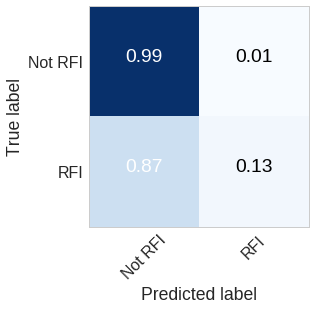

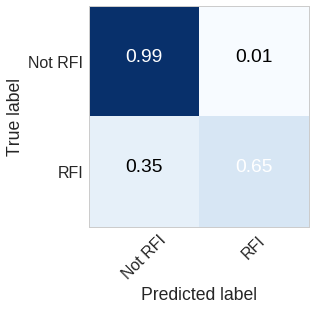

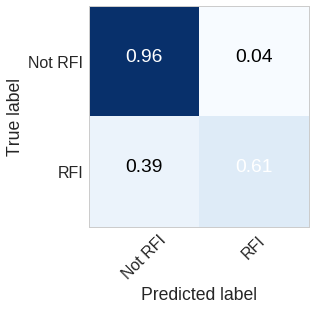

In [30]:
models =[y_pred_knn, y_pred_rfc,y_pred_gnb]
model_names =['KNN','RFC','NB']
#sns.plt.figure(figsize=(20,20))
evaluate(models,model_names)
sns.plt.show()

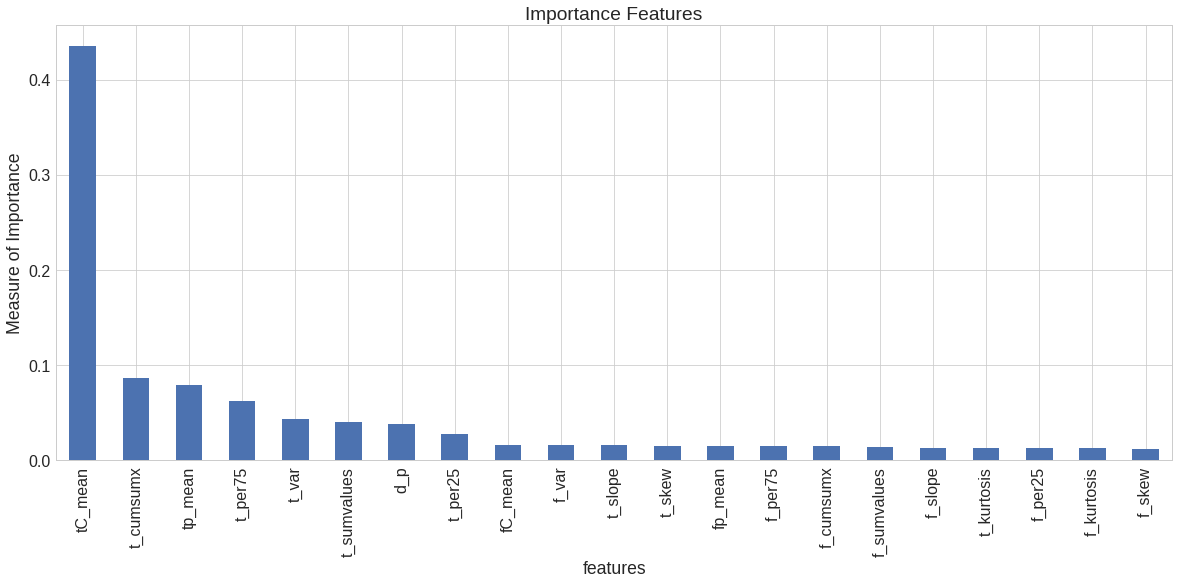

In [31]:
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

feature_space= []
# Print the feature ranking
o = open("Results/HH/HH-feature_rank.txt","w")
o.write("Feature ranking: \n")
impdf = []
for f in range(x_train0.shape[1]):
    o.write("%d. feature %s (%f) \n" % (f + 1, names[indices[f]], importances[indices[f]]))
    feature_space.append(names[indices[f]])
    impdf.append({'features': names[indices[f]], 'importance': importances[indices[f]]})
o.close()
impdf = pd.DataFrame(impdf)
impdf = impdf.sort_values(by='importance', ascending=False).reset_index(drop=True)
impdf['importance'] /= impdf['importance'].sum()
impdf.index = impdf['features']
sns.plt.figure()
impdf.plot(kind='bar', title='Importance Features', figsize=(20, 8),legend=False,fontsize=16.0)
sns.plt.ylabel("Measure of Importance")
sns.plt.grid(True)
sns.plt.savefig("Results/HH/HH-feature_rank.png",dpi=600)
sns.plt.show()

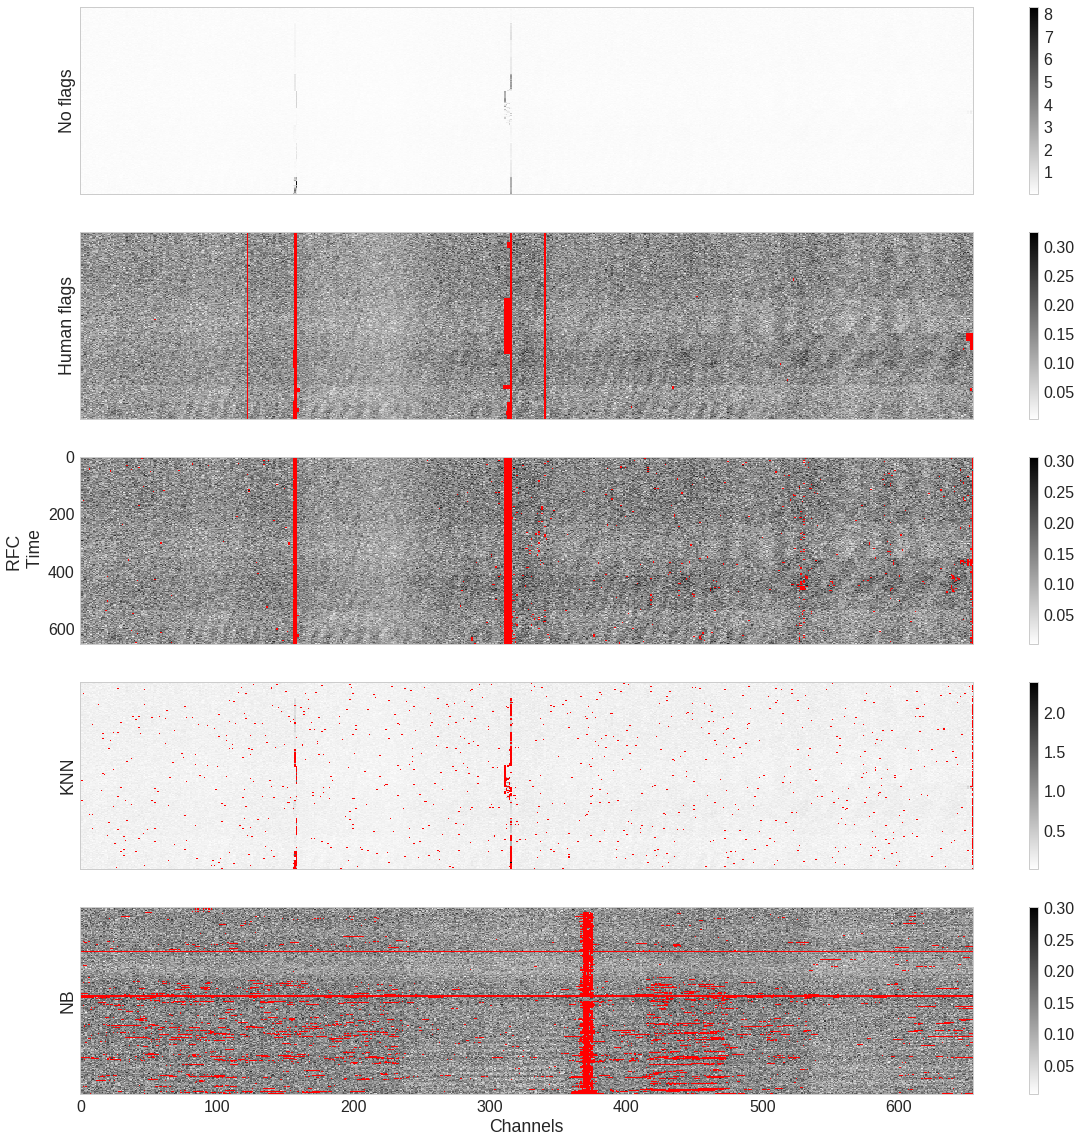

In [113]:
testVV = pd.DataFrame.from_csv('HH1333134985_pks1613-586.1822.ms_all_data_baseline2and3.csv')
testVV = testVV.replace(to_replace=np.nan,value=0.0)
rfi_rfc =rfc.predict(testVV[names])
rfi_knn = knn.predict(testVV[names])
rfi_gnb = gnb.predict(testVV[names])

image = np.reshape(testVV['d_p'],(len(testVV)/len(np.unique(testVV['frequency'])),len(np.unique(testVV['frequency']))), order='F' )
org_flags = np.reshape(testVV['rfi'],(len(testVV)/len(np.unique(testVV['frequency'])),len(np.unique(testVV['frequency']))), order='F')
rfc_flags = np.reshape(rfi_rfc,(len(testVV)/len(np.unique(testVV['frequency'])),len(np.unique(testVV['frequency']))), order='F')
knn_flags = np.reshape(rfi_knn,(len(testVV)/len(np.unique(testVV['frequency'])),len(np.unique(testVV['frequency']))), order='F')
gnb_flags = np.reshape(rfi_gnb,(len(testVV)/len(np.unique(testVV['frequency'])),len(np.unique(testVV['frequency']))), order='F')


sns.plt.figure(figsize=(20,20))
sns.plt.subplot(5,1,1)
sns.plt.imshow(image,cmap=palette,aspect ='auto')
sns.plt.grid(False)
sns.plt.colorbar()
#sns.plt.xlabel("Channels")
sns.plt.ylabel("No flags")
sns.plt.xticks([])
sns.plt.yticks([])

sns.plt.subplot(5,1,2)
sns.plt.imshow(np.ma.array(image,mask=org_flags),cmap=palette,aspect ='auto')
sns.plt.grid(False)
sns.plt.colorbar()
#sns.plt.xlabel("Channels")
sns.plt.ylabel("Human flags")
sns.plt.xticks([])
sns.plt.yticks([])


sns.plt.subplot(5,1,3)
sns.plt.imshow(np.ma.array(image,mask=rfc_flags),cmap=palette,aspect ='auto')
sns.plt.grid(False)
sns.plt.colorbar()
#sns.plt.xlabel("Channels")
sns.plt.ylabel("Time")
#sns.plt.xlabel("Channels")
sns.plt.ylabel("RFC \n Time")
sns.plt.xticks([])


sns.plt.subplot(5,1,4)
sns.plt.imshow(np.ma.array(image,mask=knn_flags),cmap=palette,aspect ='auto')
sns.plt.grid(False)
sns.plt.colorbar()
#sns.plt.xlabel("Channels")
sns.plt.ylabel("KNN")
sns.plt.xticks([])
sns.plt.yticks([])

sns.plt.subplot(5,1,5)
sns.plt.imshow(np.ma.array(image,mask=gnb_flags).T,cmap=palette,aspect ='auto')
sns.plt.grid(False)
sns.plt.colorbar()
sns.plt.xlabel("Channels")
sns.plt.ylabel("NB")
sns.plt.yticks([])
sns.plt.savefig("Results/HH/seen_HH-model_flags2.png",dpi=600)
sns.plt.show()

In [114]:
f = open("Results/HH/seen_HH-model_flags2.txt","w")
f.write(" Data mean: {0} max: {1} std: {2} median: {3} \n".format(np.ma.mean(np.ma.array(image[:,:])),
                                                  np.ma.max(np.ma.array(image[:,:])),
                                                  np.ma.std(np.ma.array(image[:,:])),
                                                  np.ma.median(np.ma.array(image[:,:]))))

f.write(" Human mean: {0} max: {1} std: {2} median: {3} ratio: {4} \n".format(np.ma.mean(np.ma.array(image[:,:],mask=org_flags[:,:])),
                                                  np.ma.max(np.ma.array(image[:,:],mask=org_flags[:,:])),
                                                  np.ma.std(np.ma.array(image[:,:],mask=org_flags[:,:])),
                                                  np.ma.median(np.ma.array(image[:,:],mask=org_flags[:,:])),
                                                  np.sum(org_flags,dtype=float)/len(np.ravel(org_flags))))

f.write(" RFC mean: {0} max: {1} std: {2} median: {3} ratio: {4} \n".format(np.ma.mean(np.ma.array(image[:,:],mask=rfc_flags[:,:])),
                                                  np.ma.max(np.ma.array(image[:,:],mask=rfc_flags[:,:])),
                                                  np.ma.std(np.ma.array(image[:,:],mask=rfc_flags[:,:])),
                                                  np.ma.median(np.ma.array(image[:,:],mask=rfc_flags[:,:])),
                                                  np.sum(rfc_flags,dtype=float)/len(np.ravel(rfc_flags))))

f.write(" KNN mean: {0} max: {1} std: {2} median: {3} ratio: {4} \n".format(np.ma.mean(np.ma.array(image[:,:],mask=knn_flags[:,:])),
                                                  np.ma.max(np.ma.array(image[:,:],mask=knn_flags[:,:])),
                                                  np.ma.std(np.ma.array(image[:,:],mask=knn_flags[:,:])),
                                                  np.ma.median(np.ma.array(image[:,:],mask=knn_flags[:,:])),
                                                  np.sum(knn_flags,dtype=float)/len(np.ravel(knn_flags))))

f.write(" NB mean: {0} max: {1} std: {2} median: {3} ratio: {4} \n".format(np.ma.mean(np.ma.array(image[:,:],mask=gnb_flags[:,:])),
                                                  np.ma.max(np.ma.array(image[:,:],mask=gnb_flags[:,:])),
                                                  np.ma.std(np.ma.array(image[:,:],mask=gnb_flags[:,:])),
                                                  np.ma.median(np.ma.array(image[:,:],mask=gnb_flags[:,:])),
                                                  np.sum(gnb_flags,dtype=float)/len(np.ravel(gnb_flags))))
f.close()

In [115]:
from pyrap.tables import table
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pylab as plt
from matplotlib.colors import LogNorm
import os.path
import time
import seaborn as sns
%matplotlib inline
palette = sns.plt.cm.gray_r
# set masked values to plot red
palette.set_bad('r', 1.0)
%time

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 19.1 µs


In [116]:
MSfile ='1333134985/pks1613-586.1822.ms/'
t = table(MSfile)
A1 = t.getcol("ANTENNA1")
A2 = t.getcol("ANTENNA2")
ant_list = list(set(np.append(A1,A2)))
nants = len(ant_list)
flags = t.getcol("FLAG")
ant1 = 3
ant2 = 4
poln = 1

Successful readonly open of default-locked table 1333134985/pks1613-586.1822.ms/: 23 columns, 18340 rows


In [117]:
flag_mask = np.array(flags[(A1==ant1) & (A2==ant2)][:,:,poln])
#flag_mask[:,0:200] = 1
#flag_mask[:,800:] = 1

In [118]:
org_flags.shape

(655, 600)

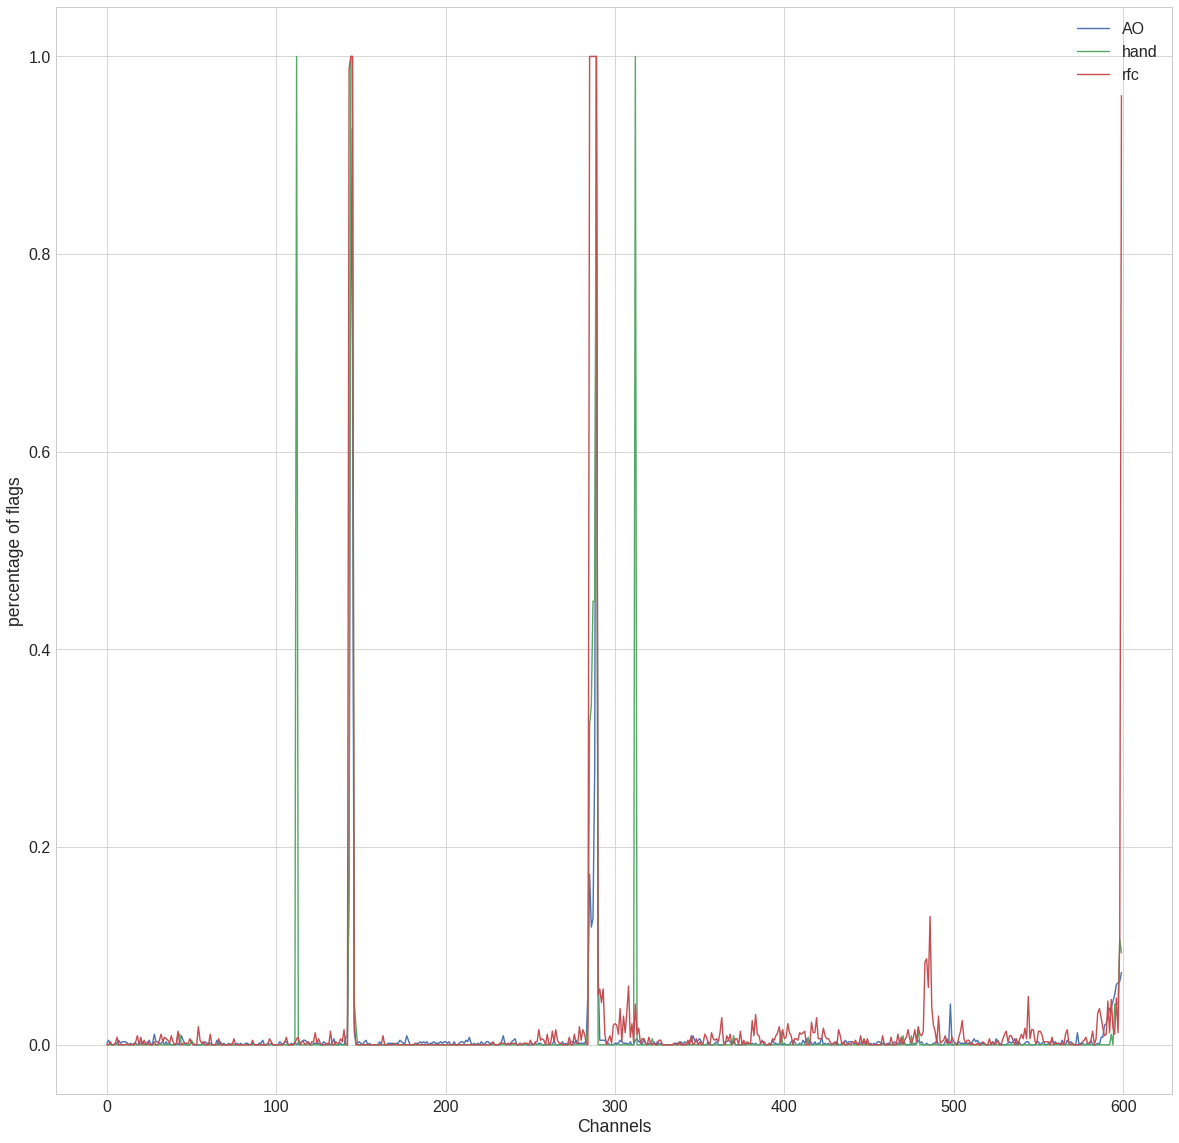

In [138]:
sns.plt.figure(figsize=(20,20))
#sns.plt.subplots_adjust(wspace=0.25)
#sns.plt.subplot(1,2,1)
sns.plt.plot(np.sum(flag_mask[:,200:800],axis=0)/655.0,label='AO')
sns.plt.plot(np.sum(org_flags[:,:],axis=0)/655.0,label='hand')
sns.plt.plot(np.sum(rfc_flags[:,:],axis=0)/655.0,label='rfc')
sns.plt.legend(loc='best')
sns.plt.xlabel('Channels')#.shape#/(644.0)
sns.plt.ylabel('percentage of flags')
#sns.plt.subplot(1,2,2)
#sns.plt.plot(np.sum(flag_mask[:,200:800],axis=1)/(600.0))#.shape#/(644.0)
#sns.plt.xlabel('time')#.shape#/(644.0)
#sns.plt.ylabel('percentage of flags')

In [131]:
print np.sum(org_flags[:,:])/(655.0*600)
print np.sum(flag_mask[:,200:800])/(655.0*600)
print np.sum(rfc_flags[:,:])/(655.0*600)
print matthews_corrcoef(org_flags,rfc_flags)
print matthews_corrcoef(org_flags,flag_mask[:,200:800])

0.0121195928753
0.0084834605598
0.0204122137405


In [139]:
np.sum(org_flags*flag_mask[:,:200:800])/(655.0*600.0)

0.012119592875318067

0.0095368956743002546

In [35]:
time = 0

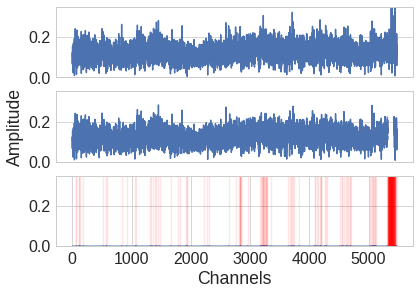

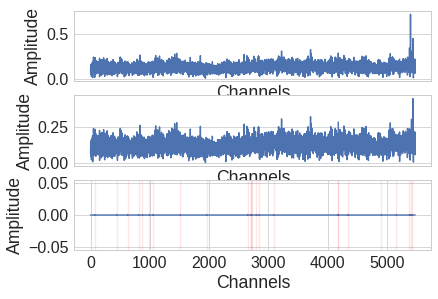

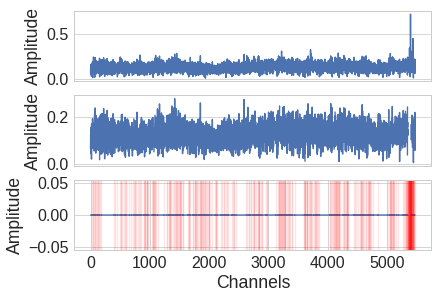

In [71]:
time = time + 40
sns.plt.figure()
sns.plt.subplot("311")
sns.plt.plot((image[:,time]))
#sns.plt.xlabel("Channels")
#sns.plt.ylabel("Amplitude")
sns.plt.xticks([])
sns.plt.ylim(0.0,0.35)
#sns.plt.plot(np.log10(np.mean(image[:,:],axis=1)))
sns.plt.subplot("312")
sns.plt.plot((np.ma.array(image[:,time],mask=rfc_flags[:,time])))
#sns.plt.xlabel("Channels")
sns.plt.ylabel("Amplitude")
sns.plt.xticks([])
sns.plt.ylim(0.0,0.35)

sns.plt.subplot("313")
sns.plt.plot((np.ma.array(image[:,time],mask=rfc_flags[:,time]) - image[:,time]))
sns.plt.xlabel("Channels")
#sns.plt.ylabel("Amplitude")
sns.plt.ylim(0.0,0.35)

for i in range(len(image[:,time])):
    if rfc_flags[i,time] == 1:
        sns.plt.axvline(i,alpha=0.1,color='r')

sns.plt.figure()
sns.plt.subplot("311")
sns.plt.plot((image[:,time]))
sns.plt.xlabel("Channels")
sns.plt.ylabel("Amplitude")
sns.plt.xticks([])
#sns.plt.plot(np.log10(np.mean(image[:,:],axis=1)))
sns.plt.subplot("312")
sns.plt.plot((np.ma.array(image[:,time],mask=knn_flags[:,time])))
sns.plt.xlabel("Channels")
sns.plt.ylabel("Amplitude")
sns.plt.xticks([])

sns.plt.subplot("313")
sns.plt.plot((np.ma.array(image[:,time],mask=knn_flags[:,time]) - image[:,time]))
sns.plt.xlabel("Channels")
sns.plt.ylabel("Amplitude")

for i in range(len(image[:,time])):
    if knn_flags[i,time] == 1:
        sns.plt.axvline(i,alpha=0.1,color='r')

sns.plt.figure()
sns.plt.subplot("311")
sns.plt.plot((image[:,time]))
#sns.plt.xlabel("Channels")
sns.plt.ylabel("Amplitude")
sns.plt.xticks([])
#sns.plt.plot(np.log10(np.mean(image[:,:],axis=1)))
sns.plt.subplot("312")
sns.plt.plot((np.ma.array(image[:,time],mask=gnb_flags[:,time])))
#sns.plt.xlabel("Channels")
sns.plt.ylabel("Amplitude")
sns.plt.xticks([])

sns.plt.subplot("313")
sns.plt.plot((image[:,time]-np.ma.array(image[:,time],mask=gnb_flags[:,time])))
sns.plt.xlabel("Channels")
sns.plt.ylabel("Amplitude")

for i in range(len(image[:,time])):
    if gnb_flags[:,time] == 1:
        sns.plt.axvline(i,alpha=0.1,color='r')



sns.plt.show()

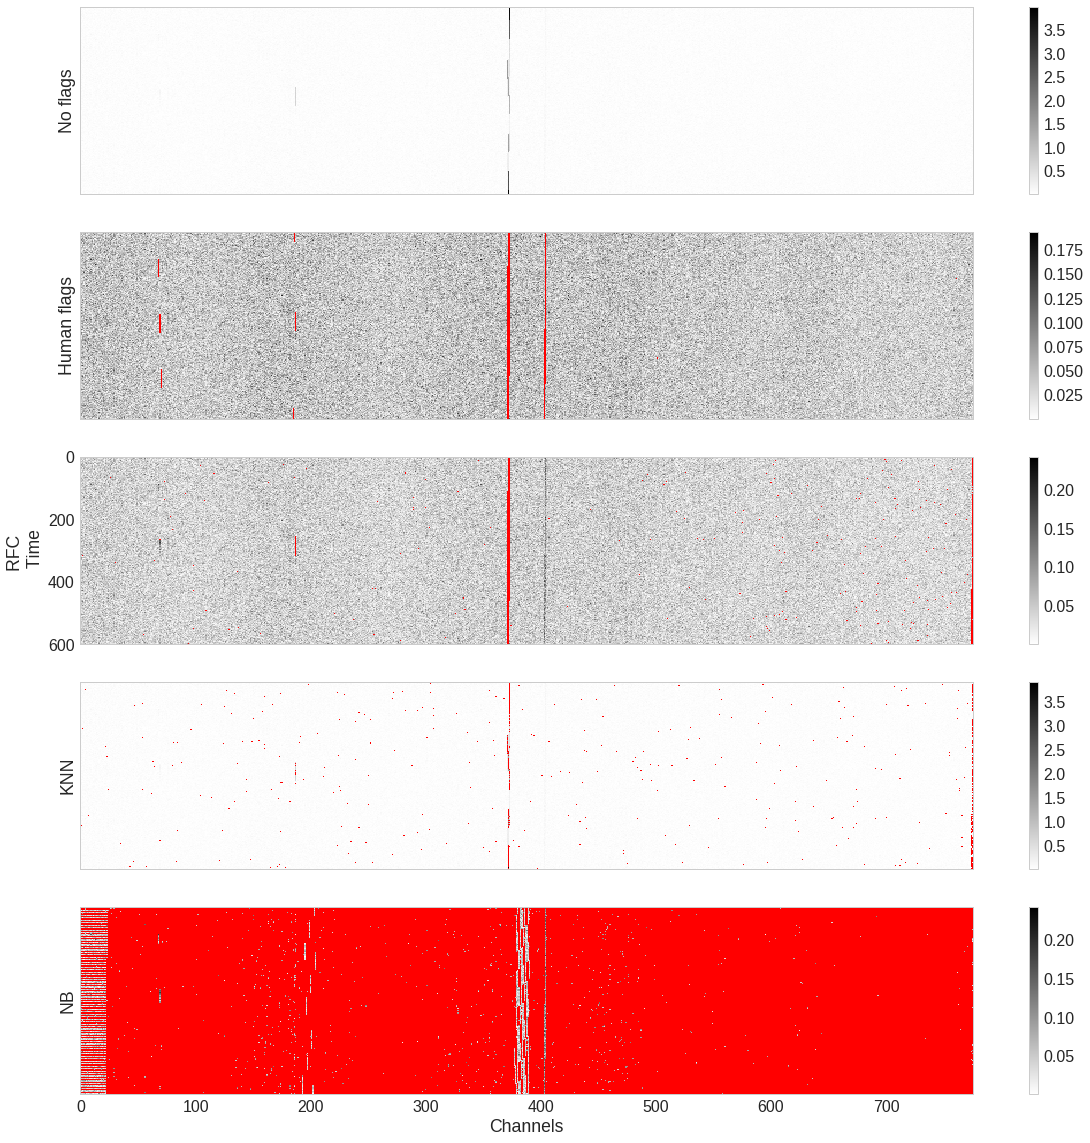

In [38]:
testVV = pd.DataFrame.from_csv('VV1333305511_pks1613-586.1822.ms_all_data_baseline0and1.csv')
rfi_rfc =rfc.predict(testVV[names])
rfi_knn = knn.predict(testVV[names])
rfi_gnb = gnb.predict(testVV[names])

image = np.reshape(testVV['d_p'],(len(testVV)/len(np.unique(testVV['frequency'])),len(np.unique(testVV['frequency']))))
org_flags = np.reshape(testVV['rfi'],(len(testVV)/len(np.unique(testVV['frequency'])),len(np.unique(testVV['frequency']))))
rfc_flags = np.reshape(rfi_rfc,(len(testVV)/len(np.unique(testVV['frequency'])),len(np.unique(testVV['frequency']))))
knn_flags = np.reshape(rfi_knn,(len(testVV)/len(np.unique(testVV['frequency'])),len(np.unique(testVV['frequency']))))
gnb_flags = np.reshape(rfi_gnb,(len(testVV)/len(np.unique(testVV['frequency'])),len(np.unique(testVV['frequency']))))


sns.plt.figure(figsize=(20,20))
sns.plt.subplot(5,1,1)
sns.plt.imshow(image.T,cmap=palette,aspect ='auto')
sns.plt.grid(False)
sns.plt.colorbar()
#sns.plt.xlabel("Channels")
sns.plt.ylabel("No flags")
sns.plt.xticks([])
sns.plt.yticks([])

sns.plt.subplot(5,1,2)
sns.plt.imshow(np.ma.array(image,mask=org_flags).T,cmap=palette,aspect ='auto')
sns.plt.grid(False)
sns.plt.colorbar()
#sns.plt.xlabel("Channels")
sns.plt.ylabel("Human flags")
sns.plt.xticks([])
sns.plt.yticks([])


sns.plt.subplot(5,1,3)
sns.plt.imshow(np.ma.array(image,mask=rfc_flags).T,cmap=palette,aspect ='auto')
sns.plt.grid(False)
sns.plt.colorbar()
#sns.plt.xlabel("Channels")
sns.plt.ylabel("Time")
#sns.plt.xlabel("Channels")
sns.plt.ylabel("RFC \n Time")
sns.plt.xticks([])


sns.plt.subplot(5,1,4)
sns.plt.imshow(np.ma.array(image,mask=knn_flags).T,cmap=palette,aspect ='auto')
sns.plt.grid(False)
sns.plt.colorbar()
#sns.plt.xlabel("Channels")
sns.plt.ylabel("KNN")
sns.plt.xticks([])
sns.plt.yticks([])

sns.plt.subplot(5,1,5)
sns.plt.imshow(np.ma.array(image,mask=gnb_flags).T,cmap=palette,aspect ='auto')
sns.plt.grid(False)
sns.plt.colorbar()
sns.plt.xlabel("Channels")
sns.plt.ylabel("NB")
sns.plt.yticks([])
sns.plt.savefig("Results/HH/seen_VV-model_flags2.png",dpi=600)
sns.plt.show()

In [39]:
f = open("Results/HH/seen_VV-model_flags2.txt","w")
f.write(" Data mean: {0} max: {1} std: {2} median: {3} \n".format(np.ma.mean(np.ma.array(image[:,:])),
                                                  np.ma.max(np.ma.array(image[:,:])),
                                                  np.ma.std(np.ma.array(image[:,:])),
                                                  np.ma.median(np.ma.array(image[:,:]))))

f.write(" Human mean: {0} max: {1} std: {2} median: {3} ratio: {4} \n".format(np.ma.mean(np.ma.array(image[:,:],mask=org_flags[:,:])),
                                                  np.ma.max(np.ma.array(image[:,:],mask=org_flags[:,:])),
                                                  np.ma.std(np.ma.array(image[:,:],mask=org_flags[:,:])),
                                                  np.ma.median(np.ma.array(image[:,:],mask=org_flags[:,:])),
                                                  np.sum(org_flags,dtype=float)/len(np.ravel(org_flags))))

f.write(" RFC mean: {0} max: {1} std: {2} median: {3} ratio: {4} \n".format(np.ma.mean(np.ma.array(image[:,:],mask=rfc_flags[:,:])),
                                                  np.ma.max(np.ma.array(image[:,:],mask=rfc_flags[:,:])),
                                                  np.ma.std(np.ma.array(image[:,:],mask=rfc_flags[:,:])),
                                                  np.ma.median(np.ma.array(image[:,:],mask=rfc_flags[:,:])),
                                                  np.sum(rfc_flags,dtype=float)/len(np.ravel(rfc_flags))))

f.write(" KNN mean: {0} max: {1} std: {2} median: {3} ratio: {4} \n".format(np.ma.mean(np.ma.array(image[:,:],mask=knn_flags[:,:])),
                                                  np.ma.max(np.ma.array(image[:,:],mask=knn_flags[:,:])),
                                                  np.ma.std(np.ma.array(image[:,:],mask=knn_flags[:,:])),
                                                  np.ma.median(np.ma.array(image[:,:],mask=knn_flags[:,:])),
                                                  np.sum(knn_flags,dtype=float)/len(np.ravel(knn_flags))))

f.write(" NB mean: {0} max: {1} std: {2} median: {3} ratio: {4} \n".format(np.ma.mean(np.ma.array(image[:,:],mask=gnb_flags[:,:])),
                                                  np.ma.max(np.ma.array(image[:,:],mask=gnb_flags[:,:])),
                                                  np.ma.std(np.ma.array(image[:,:],mask=gnb_flags[:,:])),
                                                  np.ma.median(np.ma.array(image[:,:],mask=gnb_flags[:,:])),
                                                  np.sum(gnb_flags,dtype=float)/len(np.ravel(gnb_flags))))

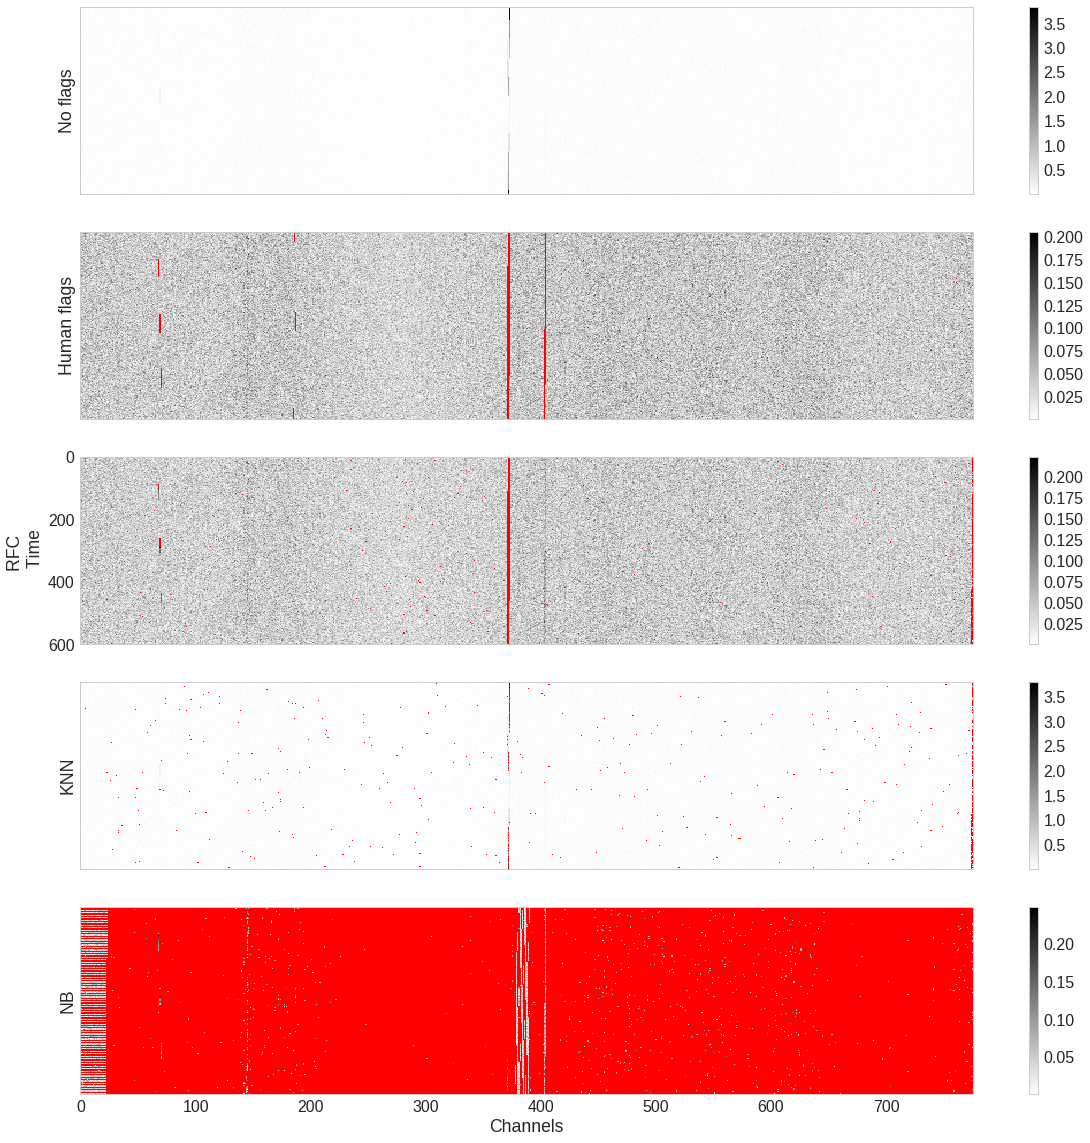

In [40]:
testVV = pd.DataFrame.from_csv('HV1333305511_pks1613-586.1822.ms_all_data_baseline0and1.csv')
rfi_rfc =rfc.predict(testVV[names])
rfi_knn = knn.predict(testVV[names])
rfi_gnb = gnb.predict(testVV[names])

image = np.reshape(testVV['d_p'],(len(testVV)/len(np.unique(testVV['frequency'])),len(np.unique(testVV['frequency']))))
org_flags = np.reshape(testVV['rfi'],(len(testVV)/len(np.unique(testVV['frequency'])),len(np.unique(testVV['frequency']))))
rfc_flags = np.reshape(rfi_rfc,(len(testVV)/len(np.unique(testVV['frequency'])),len(np.unique(testVV['frequency']))))
knn_flags = np.reshape(rfi_knn,(len(testVV)/len(np.unique(testVV['frequency'])),len(np.unique(testVV['frequency']))))
gnb_flags = np.reshape(rfi_gnb,(len(testVV)/len(np.unique(testVV['frequency'])),len(np.unique(testVV['frequency']))))


sns.plt.figure(figsize=(20,20))
sns.plt.subplot(5,1,1)
sns.plt.imshow(image.T,cmap=palette,aspect ='auto')
sns.plt.grid(False)
sns.plt.colorbar()
#sns.plt.xlabel("Channels")
sns.plt.ylabel("No flags")
sns.plt.xticks([])
sns.plt.yticks([])

sns.plt.subplot(5,1,2)
sns.plt.imshow(np.ma.array(image,mask=org_flags).T,cmap=palette,aspect ='auto')
sns.plt.grid(False)
sns.plt.colorbar()
#sns.plt.xlabel("Channels")
sns.plt.ylabel("Human flags")
sns.plt.xticks([])
sns.plt.yticks([])


sns.plt.subplot(5,1,3)
sns.plt.imshow(np.ma.array(image,mask=rfc_flags).T,cmap=palette,aspect ='auto')
sns.plt.grid(False)
sns.plt.colorbar()
#sns.plt.xlabel("Channels")
sns.plt.ylabel("Time")
#sns.plt.xlabel("Channels")
sns.plt.ylabel("RFC \n Time")
sns.plt.xticks([])


sns.plt.subplot(5,1,4)
sns.plt.imshow(np.ma.array(image,mask=knn_flags).T,cmap=palette,aspect ='auto')
sns.plt.grid(False)
sns.plt.colorbar()
#sns.plt.xlabel("Channels")
sns.plt.ylabel("KNN")
sns.plt.xticks([])
sns.plt.yticks([])

sns.plt.subplot(5,1,5)
sns.plt.imshow(np.ma.array(image,mask=gnb_flags).T,cmap=palette,aspect ='auto')
sns.plt.grid(False)
sns.plt.colorbar()
sns.plt.xlabel("Channels")
sns.plt.ylabel("NB")
sns.plt.yticks([])
sns.plt.savefig("Results/HH/seen_HV-model_flags2.png",dpi=600)
sns.plt.show()

In [41]:
f = open("Results/HH/seen_HV-model_flags2.txt","w")
f.write(" Data mean: {0} max: {1} std: {2} median: {3} \n".format(np.ma.mean(np.ma.array(image[:,:])),
                                                  np.ma.max(np.ma.array(image[:,:])),
                                                  np.ma.std(np.ma.array(image[:,:])),
                                                  np.ma.median(np.ma.array(image[:,:]))))

f.write(" Human mean: {0} max: {1} std: {2} median: {3} ratio: {4} \n".format(np.ma.mean(np.ma.array(image[:,:],mask=org_flags[:,:])),
                                                  np.ma.max(np.ma.array(image[:,:],mask=org_flags[:,:])),
                                                  np.ma.std(np.ma.array(image[:,:],mask=org_flags[:,:])),
                                                  np.ma.median(np.ma.array(image[:,:],mask=org_flags[:,:])),
                                                  np.sum(org_flags,dtype=float)/len(np.ravel(org_flags))))

f.write(" RFC mean: {0} max: {1} std: {2} median: {3} ratio: {4} \n".format(np.ma.mean(np.ma.array(image[:,:],mask=rfc_flags[:,:])),
                                                  np.ma.max(np.ma.array(image[:,:],mask=rfc_flags[:,:])),
                                                  np.ma.std(np.ma.array(image[:,:],mask=rfc_flags[:,:])),
                                                  np.ma.median(np.ma.array(image[:,:],mask=rfc_flags[:,:])),
                                                  np.sum(rfc_flags,dtype=float)/len(np.ravel(rfc_flags))))

f.write(" KNN mean: {0} max: {1} std: {2} median: {3} ratio: {4} \n".format(np.ma.mean(np.ma.array(image[:,:],mask=knn_flags[:,:])),
                                                  np.ma.max(np.ma.array(image[:,:],mask=knn_flags[:,:])),
                                                  np.ma.std(np.ma.array(image[:,:],mask=knn_flags[:,:])),
                                                  np.ma.median(np.ma.array(image[:,:],mask=knn_flags[:,:])),
                                                  np.sum(knn_flags,dtype=float)/len(np.ravel(knn_flags))))

f.write(" NB mean: {0} max: {1} std: {2} median: {3} ratio: {4} \n".format(np.ma.mean(np.ma.array(image[:,:],mask=gnb_flags[:,:])),
                                                  np.ma.max(np.ma.array(image[:,:],mask=gnb_flags[:,:])),
                                                  np.ma.std(np.ma.array(image[:,:],mask=gnb_flags[:,:])),
                                                  np.ma.median(np.ma.array(image[:,:],mask=gnb_flags[:,:])),
                                                  np.sum(gnb_flags,dtype=float)/len(np.ravel(gnb_flags))))